# Decision Trees - Purchase Prediction

In [87]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [88]:
data = pd.read_csv("Delhi+Delights+Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average Delivery Rating (a1)   30 non-null     float64
 1   Average Orders per month (a2)  30 non-null     int64  
 2   "Delighted Members" Purchase   30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [89]:
data = data.rename(columns = dict(zip(data.columns, ["Rating", "Orders per month", "Purchase"])))

In [124]:
data.describe()

,Rating,Orders per month
count,30.000000,30.000000
mean,3.066667,21.000000
std,1.040004,10.763924
min,1.500000,11.000000
25%,2.500000,13.000000
50%,3.000000,15.000000
75%,3.500000,27.000000
max,4.500000,39.000000


### Manually calculating information gain

#### Define helper functions to calculate entropy and gini index

In [122]:
import functools
import math

class information_measures:
    
    # Instance attributes
    def __init__(self, value_counts):
        self.value_counts = value_counts
        self.n = self.value_counts.sum()
        
        self.pi = []
        for i in self.value_counts.keys():
            self.pi.append(self.value_counts[i]/self.n)
            
    def gini_impurity (self):
        return 1 - functools.reduce(lambda a,b: a**2 + b**2, self.pi)

    def entropy(self):
        return -1*functools.reduce(lambda a,b: a*math.log(a,2) + b*math.log(b,2), self.pi)

In [127]:
x = data.Purchase.value_counts()
dt_loss = information_measures(x)

gini_before_split = dt_loss.gini_impurity() 
entropy_before_split = dt_loss.entropy()

print("Gini of original dataset:", gini_before_split)
print("Entropy of original dataser:", entropy_before_split)

Gini of original dataset: 0.5
Entropy of original dataser: 1.0


#### Let's split the dataset on the mean of orders per month

In [132]:
subset_a = data[data["Orders per month"] < data["Orders per month"].mean()]["Purchase"]
subset_b = data[data["Orders per month"] >= data["Orders per month"].mean()]["Purchase"]

gini_subset_a = information_measures(subset_a.value_counts()).gini_impurity()
gini_subset_b = information_measures(subset_b.value_counts()).gini_impurity()

In [133]:
# Weighted gini and entropy

weighted_gini = gini_subset_a*(len(subset_a)/len(data)) + gini_subset_b*(len(subset_b)/len(data))
weighted_gini

0.3518518518518518

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
y = data['Purchase']
X = data[["Rating", "Orders per month"]]

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, test_size = 0.2)
X_train.shape, X_test.shape

((24, 2), (6, 2))

### Building a Decision Tree Model using SKLearn

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, min_samples_split = 10, min_samples_leaf = 5, criterion = 'gini')
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

### Visualizing the Decision Tree

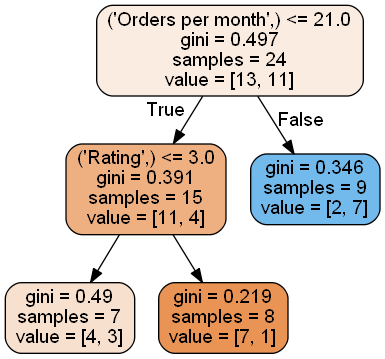

In [45]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
